In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_table('train.tsv')

C:\Users\allusers\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  """Entry point for launching an IPython kernel.


In [3]:
data.head()

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity


In [4]:
data.describe()

,train_id,item_condition_id,price,shipping
count,1.482535e+06,1.482535e+06,1.482535e+06,1.482535e+06
mean,7.412670e+05,1.907380e+00,2.673752e+01,4.472744e-01
std,4.279711e+05,9.031586e-01,3.858607e+01,4.972124e-01
min,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
25%,3.706335e+05,1.000000e+00,1.000000e+01,0.000000e+00
50%,7.412670e+05,2.000000e+00,1.700000e+01,0.000000e+00
75%,1.111900e+06,3.000000e+00,2.900000e+01,1.000000e+00
max,1.482534e+06,5.000000e+00,2.009000e+03,1.000000e+00


In [5]:
data.shape

(1482535, 8)

In [6]:
data.size

11860280

In [7]:
train, test = train_test_split(data, test_size=0.2)

In [8]:
train.shape

(1186028, 8)

In [10]:
test.shape

(296507, 8)

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1186028 entries, 1178706 to 403368
Data columns (total 8 columns):
train_id             1186028 non-null int64
name                 1186028 non-null object
item_condition_id    1186028 non-null int64
category_name        1180927 non-null object
brand_name           679653 non-null object
price                1186028 non-null float64
shipping             1186028 non-null int64
item_description     1186026 non-null object
dtypes: float64(1), int64(3), object(4)
memory usage: 81.4+ MB


In [17]:
train.isnull().sum()

train_id                  0
name                      0
item_condition_id         0
category_name          5101
brand_name           506375
price                     0
shipping                  0
item_description          2
dtype: int64

Text(0, 0.5, 'Frequency')

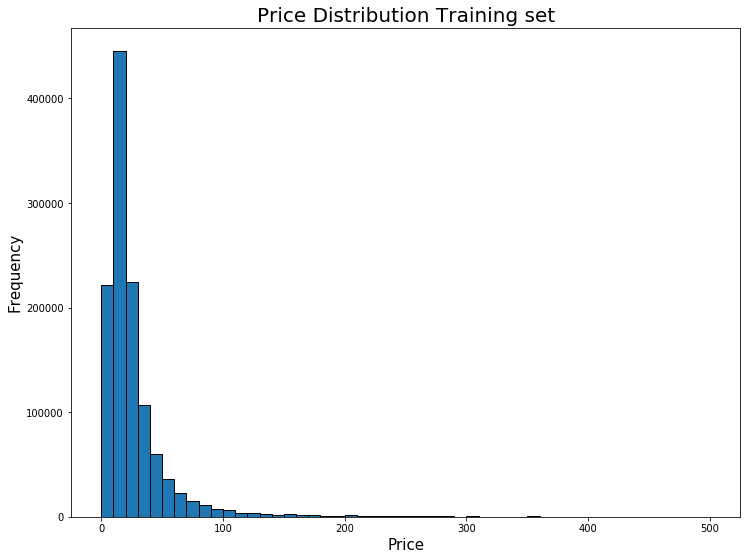

In [23]:
train['price'].plot.hist(bins=50,figsize=(12,9),range=[0,500],edgecolor='k')
plt.title('Price Distribution Training set', fontsize=20)
plt.xlabel('Price',fontsize=15)
plt.ylabel('Frequency',fontsize=15)

In [24]:
train['shipping'].value_counts(normalize=True)*100

0    55.284024
1    44.715976
Name: shipping, dtype: float64

Text(0, 0.5, 'Frequency')

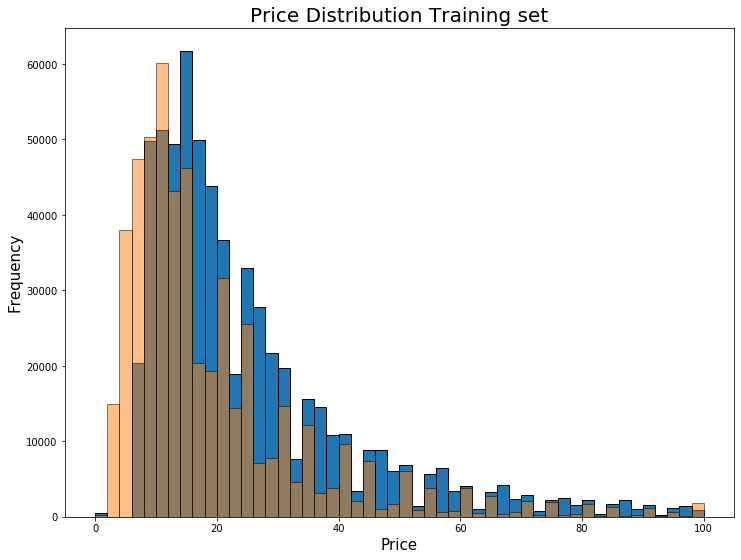

In [28]:
train['price'][train['shipping']==0].plot.hist(bins=50,figsize=(12,9),range=[0,100],edgecolor='k')
train['price'][train['shipping']==1].plot.hist(bins=50,figsize=(12,9),range=[0,100],edgecolor='k',alpha=0.5)
plt.title('Price Distribution Training set', fontsize=20)
plt.xlabel('Price',fontsize=15)
plt.ylabel('Frequency',fontsize=15)

In [30]:
print(train['price'][train['shipping']==1].describe())
print('\n')
print(train['price'][train['shipping']==0].describe())

count    530344.000000
mean         22.548016
std          36.967639
min           0.000000
25%           9.000000
50%          14.000000
75%          25.000000
max        2000.000000
Name: price, dtype: float64


count    655684.000000
mean         30.108872
std          39.561126
min           0.000000
25%          13.000000
50%          20.000000
75%          33.000000
max        2009.000000
Name: price, dtype: float64


In [31]:
print(train['price'][train['shipping']==1].median())
print('\n')
print(train['price'][train['shipping']==0].median())

14.0


20.0


In [32]:
train['item_condition_id'].value_counts(normalize=True, sort=False)*100

1    43.228490
2    25.319385
3    29.129413
4     2.159224
5     0.163487
Name: item_condition_id, dtype: float64

TypeError: boxplot() got an unexpected keyword argument 'y'

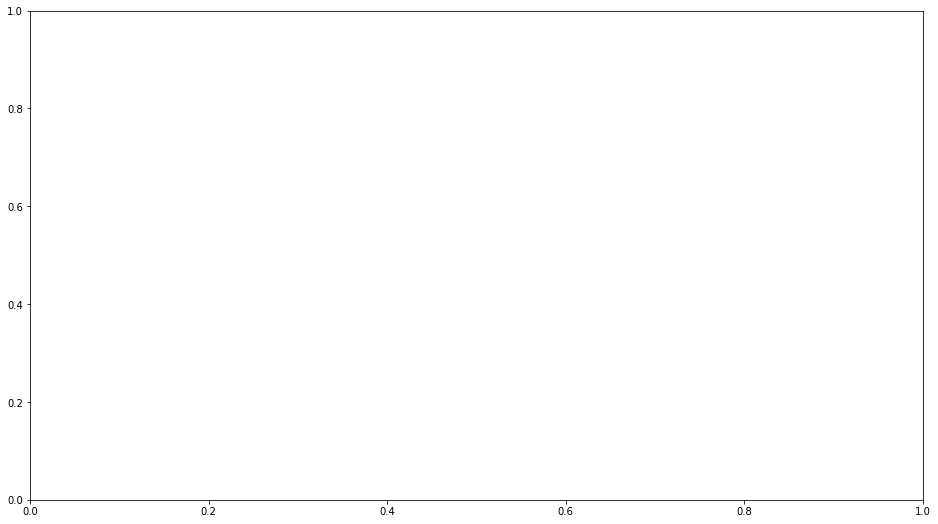

In [41]:
price_100 = train[train['price']<100]
fig, ax = plt.subplots(figsize=(16,9))
plt.boxplot(price_100.drop('price'),)
# sns.boxplot(x='item_condition_id', y='price', data=price_100, ax=ax)
plt.xlabel('Item Condition', fontsize=15)
plt.ylabel('Price', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()